# Email Spam Classification

## Project Preparation

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Load the dataset

In [2]:
df = pd.read_csv("dataset/spam.csv")
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Split the data into train and test set

In [3]:
X = df.iloc[:, 1:2]
y = df.iloc[:, 0:1]

Visualize the class distribution

[]

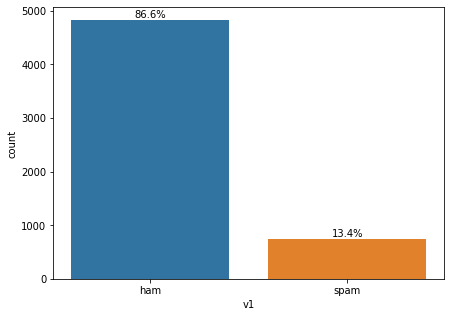

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="v1", data=df)
   
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(X))
    x_countplot = p.get_x() + p.get_width()/2
    y_countplot = p.get_height()+ 50
    ax.annotate(percentage, (x_countplot, y_countplot), ha='center')
plt.plot()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.20, random_state=42)

Feature Extraction

In [7]:
vectorizer = CountVectorizer()

## Model Training

In [8]:
clf_method = KNeighborsClassifier()

clf = Pipeline([
     ('vectorizer', vectorizer),
     ('classifier', clf_method)
 ])

clf.fit(X_train.values.ravel(), y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [14]:
y_train_pred = clf.predict(X_train.values.ravel())

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.3f}")

Train Accuracy: 0.932


In [10]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96      3860
        spam       1.00      0.49      0.66       597

    accuracy                           0.93      4457
   macro avg       0.96      0.74      0.81      4457
weighted avg       0.94      0.93      0.92      4457



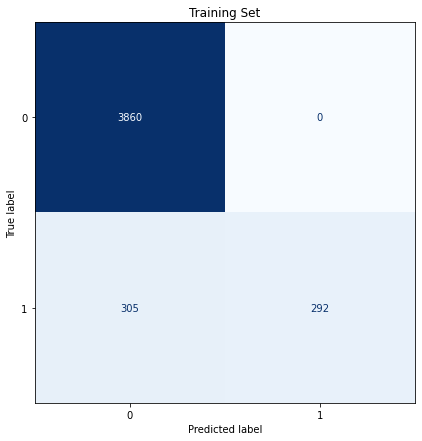

In [17]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred))

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Training Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False);

## Model Evaluation

In [13]:
y_test_pred = clf.predict(X_test.values.ravel())

print(f"Train Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")

Train Accuracy: 0.919


In [15]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.96       965
        spam       1.00      0.40      0.57       150

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.76      1115
weighted avg       0.93      0.92      0.90      1115



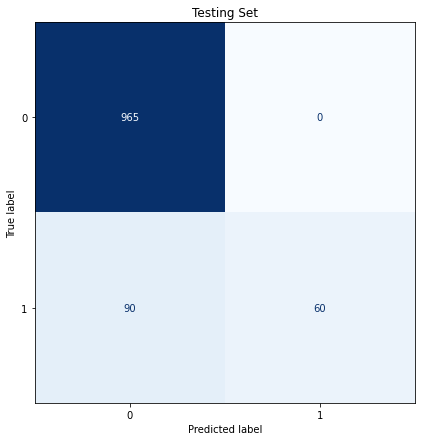

In [18]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Testing Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False);